In [52]:
import os
import json
import yaml
import pandas as pd

In [94]:
model_config = yaml.safe_load(open('efficient2/VI/BT/large/checkpoint/config.yaml'))

In [95]:
model_config.keys()

dict_keys(['config', 'data', 'init_dict'])

In [96]:
model_config

{'config': {'lr': 2e-05,
  'seed': 123,
  'gradient_accumulation_steps': 1,
  'weight_decay': 0.01,
  'validation_metrics': ['MRR@10', 'recall@100', 'recall@200', 'recall@500'],
  'pretrained_no_yamlconfig': False,
  'nb_iterations': 80000,
  'train_batch_size': 24,
  'eval_batch_size': 24,
  'index_retrieve_batch_size': 24,
  'record_frequency': 20000,
  'train_monitoring_freq': 100,
  'warmup_steps': 5000,
  'max_length': 256,
  'fp16': True,
  'matching_type': 'splade',
  'monitoring_ckpt': 'MRR@10',
  'overwrite_final': True,
  'tokenizer_type': 'models/mlm_flops/DistilBERT',
  'top_k': 1000,
  'eval_metric': [['mrr_10', 'recall'],
   ['ndcg_cut'],
   ['mrr_10', 'recall'],
   ['ndcg_cut'],
   ['mrr_10', 'recall']],
  'threshold': 0,
  'loss': 'KlDiv',
  'regularizer': {'FLOPS': {'lambda_d': 0.5,
    'lambda_q': 0.4,
    'T': 50000,
    'targeted_rep': 'rep',
    'reg': 'FLOPS'}},
  'checkpoint_dir': 'models/efficient2/VI/BT/large/checkpoint',
  'index_dir': 'models/efficient2/VI/BT

In [64]:
models = dict()

for path, subdirs, files in os.walk('./'):
    for name in files:
        if(name=="flops.json"):
            model_name = path.split("/")[1]
            print(path)
            print(model_name)
            if(model_name in models):
                model = models[model_name]
                model["flops"] = json.load(open(os.path.join(path, name)))["flops"]
                models[model_name] = model
            else:
                model = dict()
                model["flops"] = json.load(open(os.path.join(path, name)))["flops"]
                models[model_name] = model
            print(os.path.join(path, name))
        if(name=="perf_all_datasets.json"):
            print(os.path.join(path, name))
            model_name = path.split("/")[1]
            print(path)
            print(model_name)
            if(model_name in models):
                model = models[model_name]
                model["mrr"] = json.load(open(os.path.join(path, name)))["MSMARCO"]["mrr_10"]
                models[model_name] = model
            else:
                model = dict()
                model["mrr"] = json.load(open(os.path.join(path, name)))["MSMARCO"]["mrr_10"]
                models[model_name] = model
            print(os.path.join(path, name))

./cocondenser_ensemble_distil_monogpu_q1_d04/out
cocondenser_ensemble_distil_monogpu_q1_d04
./cocondenser_ensemble_distil_monogpu_q1_d04/out/flops.json
./cocondenser_ensemble_distil_monogpu_q1_d04/out/perf_all_datasets.json
./cocondenser_ensemble_distil_monogpu_q1_d04/out
cocondenser_ensemble_distil_monogpu_q1_d04
./cocondenser_ensemble_distil_monogpu_q1_d04/out/perf_all_datasets.json
./cocondenser_ensemble_distil_monogpu/out
cocondenser_ensemble_distil_monogpu
./cocondenser_ensemble_distil_monogpu/out/flops.json
./cocondenser_ensemble_distil_monogpu/out/perf_all_datasets.json
./cocondenser_ensemble_distil_monogpu/out
cocondenser_ensemble_distil_monogpu
./cocondenser_ensemble_distil_monogpu/out/perf_all_datasets.json
./cocondenser_L1/out
cocondenser_L1
./cocondenser_L1/out/flops.json
./cocondenser_L1/out/perf_all_datasets.json
./cocondenser_L1/out
cocondenser_L1
./cocondenser_L1/out/perf_all_datasets.json
./cocondenser_ensemble_distil_monogpu_10_12/out
cocondenser_ensemble_distil_monog

In [73]:
models_ = pd.DataFrame.from_dict(models,orient = "index")
models_

,flops,mrr
cocondenser_ensemble_distil_monogpu_q1_d04,5.889728,0.357563
cocondenser_ensemble_distil_monogpu,1.336463,0.371022
cocondenser_L1,35.270141,0.368968
cocondenser_ensemble_distil_monogpu_10_12,1.025390,0.361480
cocondenser_1_0.9,0.749666,0.360141
efficient3,0.148724,0.368197
efficient2,0.009213,0.215788
efficient,3.310741,0.366786


In [77]:
model_index = models_.reset_index()
model_index

,index,flops,mrr
0,cocondenser_ensemble_distil_monogpu_q1_d04,5.889728,0.357563
1,cocondenser_ensemble_distil_monogpu,1.336463,0.371022
2,cocondenser_L1,35.270141,0.368968
3,cocondenser_ensemble_distil_monogpu_10_12,1.025390,0.361480
4,cocondenser_1_0.9,0.749666,0.360141
5,efficient3,0.148724,0.368197
6,efficient2,0.009213,0.215788
7,efficient,3.310741,0.366786


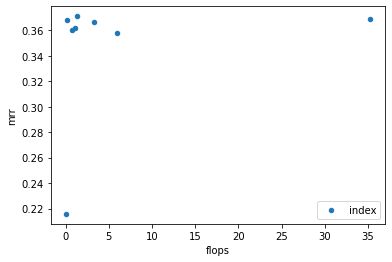

In [79]:
model_index.plot.scatter(x='flops',y='mrr',label=r"index")
